### Step 00: Loading Libraries
Here we will load all necessary python libraries to solve the problem

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy import stats

### Step 01: Data Load
 Let's load the data from raw file with preprocessing of date field

In [2]:
# Importing the dataset
dataset = pd.read_csv('Ceny_nieruchomości.csv')

In [3]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


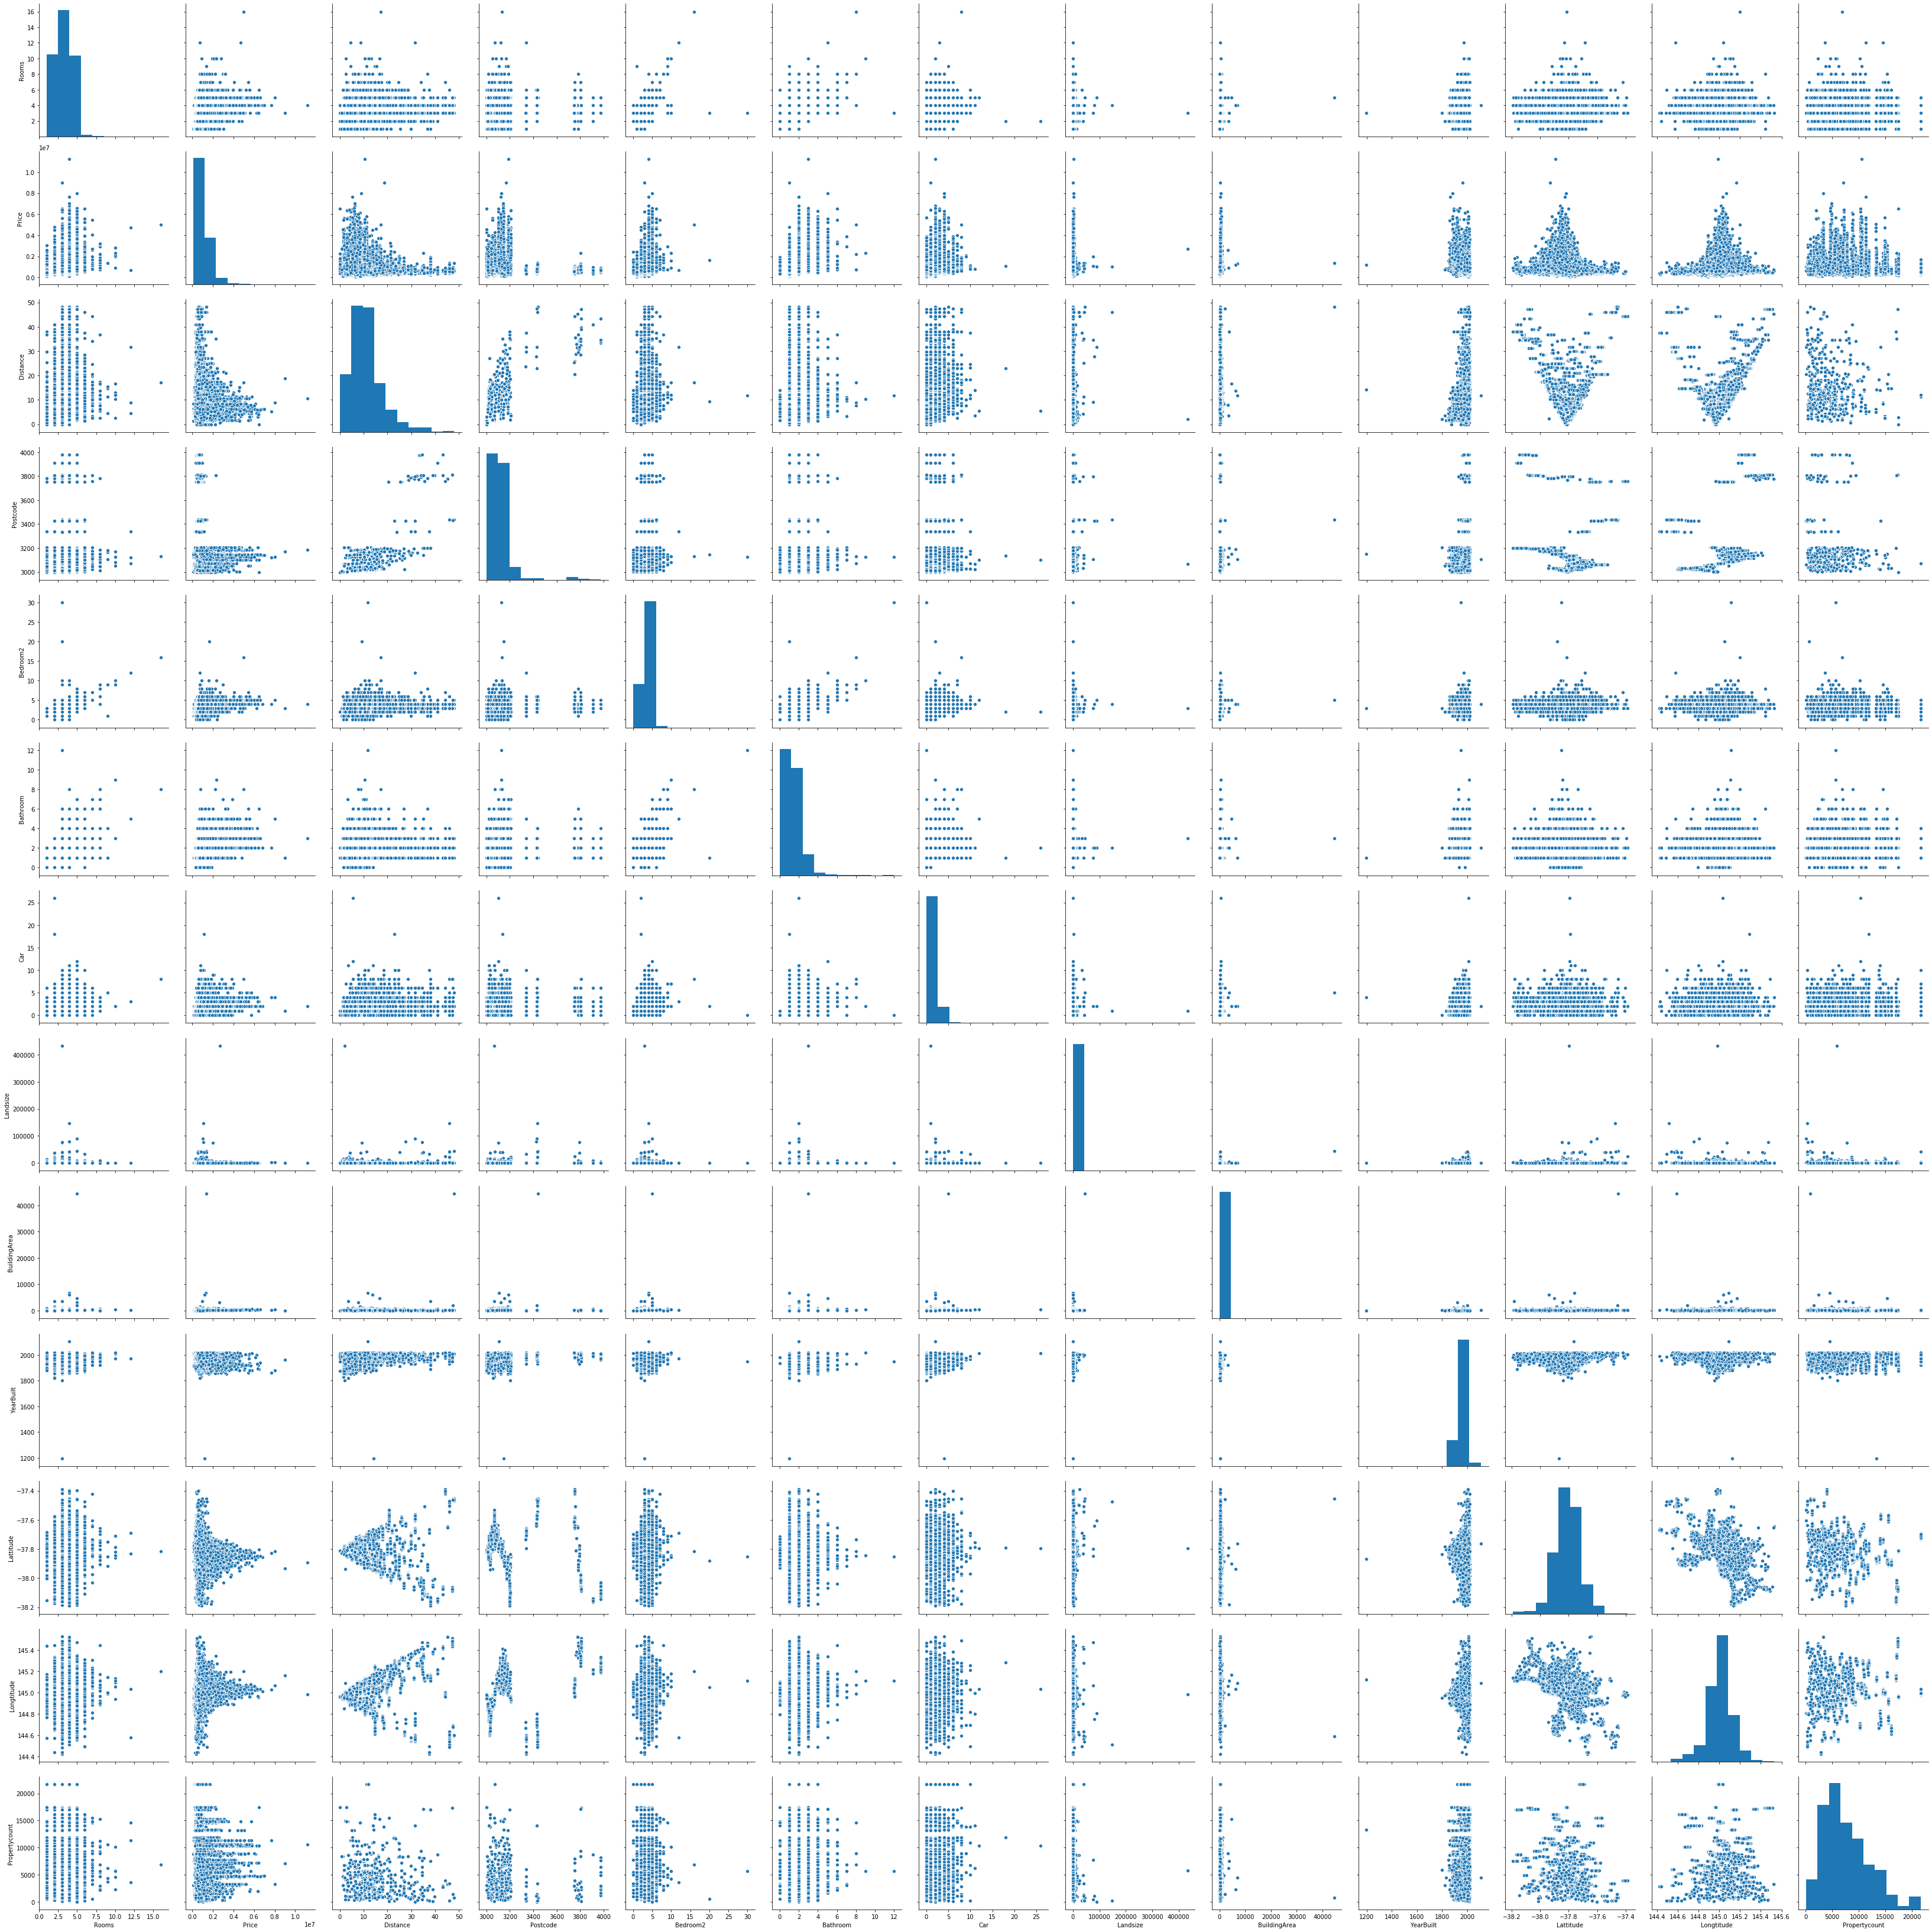

In [5]:
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(dataset, height=3.5)
plt.tight_layout()

,Total,Percent
Propertycount,0,0.0
Postcode,0,0.0
Rooms,0,0.0
Type,0,0.0
Price,0,0.0
Method,0,0.0
SellerG,0,0.0
Date,0,0.0


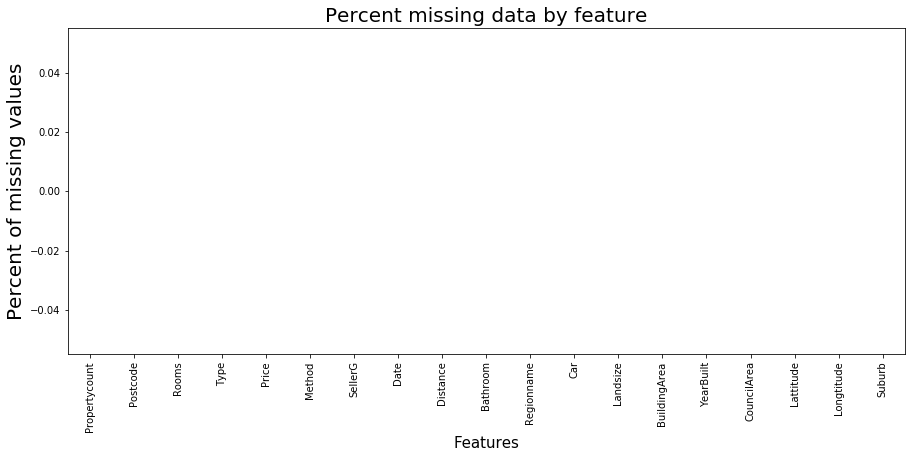

In [15]:

total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)
missing_data.head(8)

#### Conversion of data

### Step -- : Data Cleaning

In [6]:
dataset = dataset[pd.notnull(dataset['Price'])]
dataset = dataset[pd.notnull(dataset['Lattitude'])]
dataset = dataset[pd.notnull(dataset['BuildingArea'])]
dataset = dataset[pd.notnull(dataset['YearBuilt'])]
dataset = dataset[pd.notnull(dataset['Car'])]

In [7]:
dataset = dataset.drop(columns=['Bedroom2'])
dataset = dataset.drop(columns=['Address'])

In [17]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
listToEncode = ['Method','Suburb', 'Type', 'Regionname', 'CouncilArea', 'SellerG']
dataset[listToEncode] = dataset[listToEncode].apply(LabelEncoder().fit_transform)
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PriceM2
2,0,2,0,1035000.0,1,24,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0,13101.265823
4,0,3,0,1465000.0,3,24,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0,9766.666667
6,0,4,0,1600000.0,4,155,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0,11267.605634
11,0,3,0,1876000.0,1,155,7/05/2016,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0,8933.333333
14,0,2,0,1636000.0,1,155,8/10/2016,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,31,-37.8060,144.9954,2,4019.0,15289.719626


In [18]:
# h=0, t=1, u=2
dataset.groupby('Type').size()

Type
0    7490
1     860
2    1721
dtype: int64

### Create new features

In [16]:
dataset['PriceM2'] = dataset['Price'] / dataset['BuildingArea']

In [11]:
DataWithLandsize = dataset[pd.isnull(dataset['Landsize']) == False]
DataWithoutLandsize = dataset[pd.isnull(dataset['Landsize'])]

In [12]:
# Porównac rozklady, cena za metr 2, uzupelnic building area, 

In [13]:
from sklearn.ensemble import RandomForestRegressor
independentVariables = ['Distance', 'Rooms', 'CouncilArea', 'Propertycount', 'Type']

rfModel_land = RandomForestRegressor()
rfModel_land.fit(DataWithLandsize[independentVariables], DataWithLandsize['Landsize'])

generatedValues = rfModel_land.predict(X = DataWithoutLandsize[independentVariables])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
DataWithoutLandsize['Landsize'] = generatedValues.astype(int)
dataset = DataWithLandsize.append(DataWithoutLandsize)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


I have appended the data with generated Land size to the data used as the training set. 
You can quickly fix that by resetting the index and dropping the index column. 

In [ ]:
#data.reset_index(inplace=True)
#data.drop('index',inplace=True,axis=1)

In [21]:
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PriceM2
2,0,2,0,1035000.0,1,24,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0,13101.265823
4,0,3,0,1465000.0,3,24,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0,9766.666667
6,0,4,0,1600000.0,4,155,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0,11267.605634
11,0,3,0,1876000.0,1,155,7/05/2016,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0,8933.333333
14,0,2,0,1636000.0,1,155,8/10/2016,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,31,-37.8060,144.9954,2,4019.0,15289.719626


In [20]:
X = dataset.drop(["Price", 'PriceM2'],axis=1)
y = pd.DataFrame(dataset['PriceM2']) 

#### Data transformation

In [23]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
dataset['Date'].max()

In [ ]:
dataset['Date'].min()

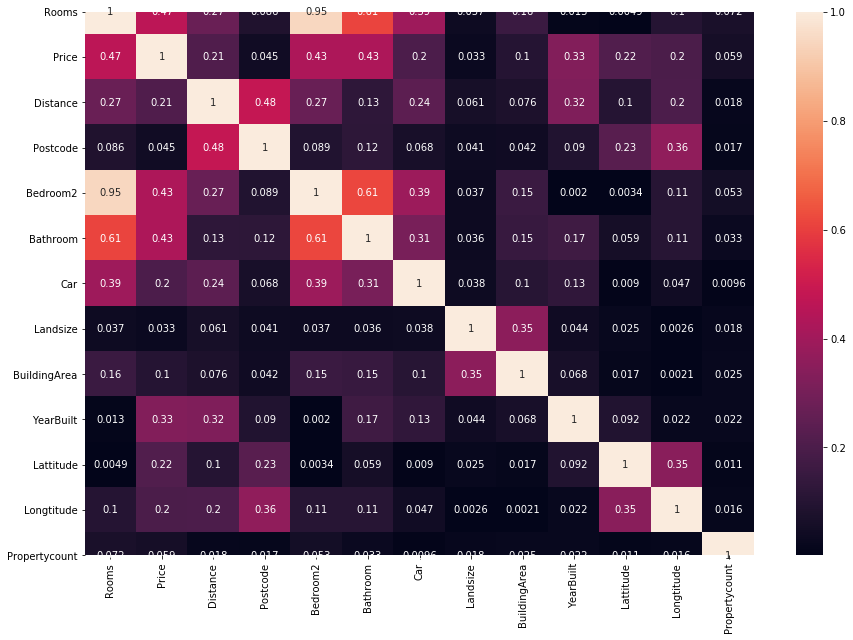

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr().abs(),  annot=True)

In [15]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

NameError: name 'cols' is not defined

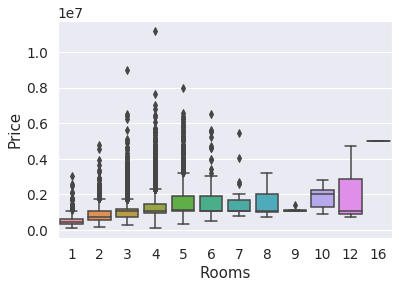

In [55]:
sns.boxplot(x=df['Rooms'], y=df['Price'])

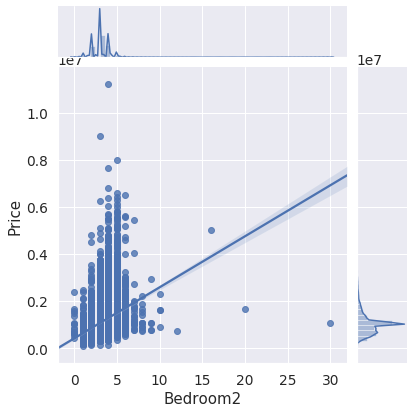

In [57]:
# Living Area vs Sale Price
sns.jointplot(x=df['Bedroom2'], y=df['Price'], kind='reg')

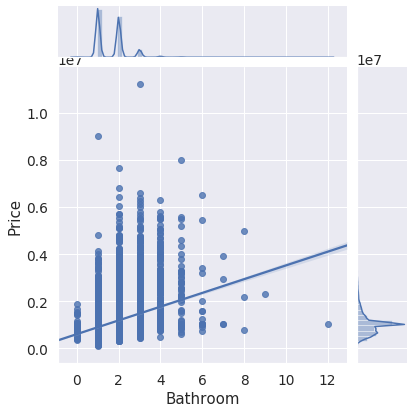

In [48]:
# Living Area vs Sale Price
sns.jointplot(x=df['Bathroom'], y=df['Price'], kind='reg')

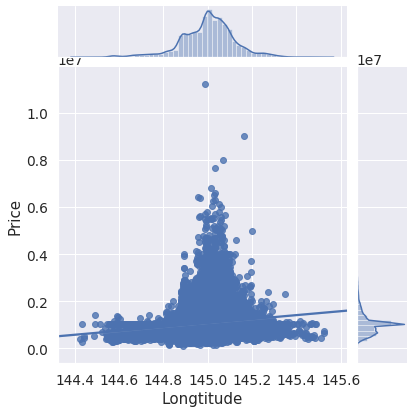

In [49]:
# Living Area vs Sale Price
sns.jointplot(x=df['Longtitude'], y=df['Price'], kind='reg')

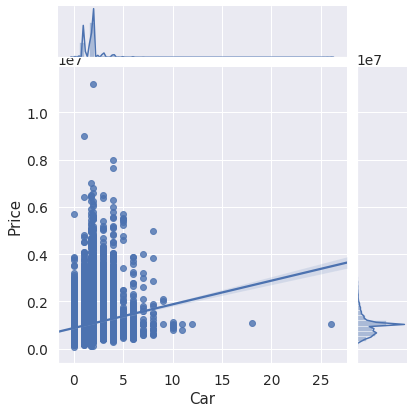

In [60]:
# Living Area vs Sale Price
sns.jointplot(x=df['Car'], y=df['Price'], kind='reg')

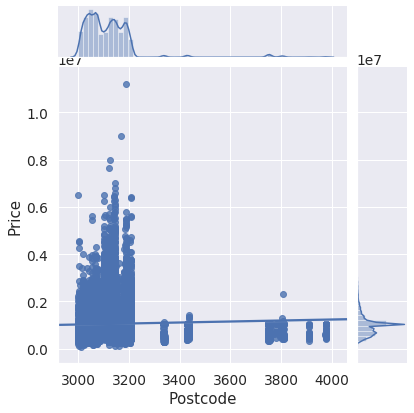

In [50]:
# Living Area vs Sale Price
sns.jointplot(x=df['Postcode'], y=df['Price'], kind='reg')

In [32]:
df['Price'].describe()

count    3.485700e+04
mean     1.050173e+06
std      5.671357e+05
min      8.500000e+04
25%      6.950000e+05
50%      1.050173e+06
75%      1.150000e+06
max      1.120000e+07
Name: Price, dtype: float64


 mu = 1050173.34 and sigma = 567127.60



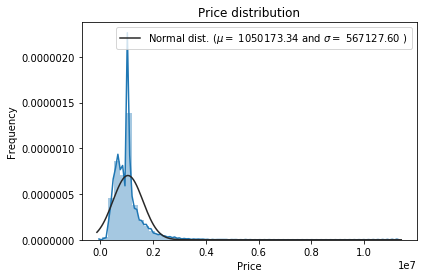

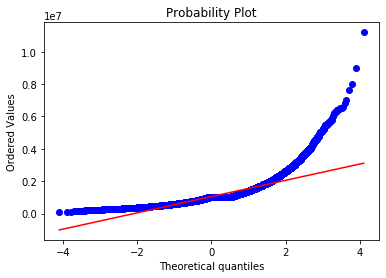

Skewness: 2.928245
Kurtosis: 17.592436


In [39]:
# Plot Histogram
sns.distplot(df['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

In [25]:
dataset["Method"]= dataset["Method"].replace('SS', 0)
dataset["Method"]= dataset["Method"].replace('S', 1)
dataset["Method"]= dataset["Method"].replace('VB', 2)
dataset["Method"]= dataset["Method"].replace('SP', 3)
dataset["Method"]= dataset["Method"].replace('PI', 4)
dataset["Method"]= dataset["Method"].replace('SN', 5)
dataset["Method"]= dataset["Method"].replace('W', 6)
dataset["Method"]= dataset["Method"].replace('PN', 7)
dataset["Method"]= dataset["Method"].replace('SA', 8)

In [19]:
dataset["Regionname"]= dataset["Regionname"].replace('Northern Metropolitan', 0)
dataset["Regionname"]= dataset["Regionname"].replace('Western Metropolitan', 1)
dataset["Regionname"]= dataset["Regionname"].replace('Southern Metropolitan', 2)
dataset["Regionname"]= dataset["Regionname"].replace('Eastern Metropolitan', 3)
dataset["Regionname"]= dataset["Regionname"].replace('South-Eastern Metropolitan', 4)
dataset["Regionname"]= dataset["Regionname"].replace('Northern Victoria', 5)
dataset["Regionname"]= dataset["Regionname"].replace('Western Victoria', 6)
dataset["Regionname"]= dataset["Regionname"].replace('Eastern Victoria', 7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [20]:
dataset['Regionname'].unique()

array([0, 1, 2, 3, 4, 7, 5, 6])

In [72]:
dataset.dropna(inplace=True)

In [73]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,0.0,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,0.0,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,0.0,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,0.0,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,0.0,4019.0
